# Analyzing top hits playlists audio features by country 

## We will do:
- Analytics by country
- classifying tracks based on their audio features where the target variable is the country 

In [1]:
import MySQLdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../')
import myenvvar

In [2]:
conn = MySQLdb.Connection(
        host=myenvvar.db_vars['host'],
        user=myenvvar.db_vars['user'],
        passwd=myenvvar.db_vars['password'],
        port=myenvvar.db_vars['port'],
        db=myenvvar.db_vars['db']
        )
conn.set_character_set('utf8')

# Read top hits by country playlists and tracks

In [3]:
q = "select p.playlist_name, pt.playlist_id, af.* \
    from playlists p join playlists_tracks pt join audio_features af \
    on p.playlist_id = pt.playlist_id and pt.track_id = af.track_id \
    where p.playlist_name like 'Top Hits%'"
top_hits_by_country_df = pd.read_sql(q, conn)
top_hits_by_country_df.shape

(457, 19)

In [4]:
top_hits_by_country_df.head()

,playlist_name,playlist_id,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,total_available_markets,popularity,added_datetime
0,Top Hits Greece,37i9dQZF1DX0e5BFIQWSDG,017PF4Q3l4DBUiWoXk4OWT,0.730,0.729,4,-3.434,0,0.0886,0.16700,0.00000,0.3490,0.467,113.012,221820,4,76,90,2020-06-12 08:59:52
1,Top Hits Greece,37i9dQZF1DX0e5BFIQWSDG,01Y0KGT7VzixtLyOj44x56,0.881,0.783,8,-3.070,0,0.1630,0.38200,0.00010,0.1010,0.545,102.040,155293,4,79,63,2020-06-12 08:59:52
2,Top Hits Greece,37i9dQZF1DX0e5BFIQWSDG,0dD17UWACV5aYTyeS6af1k,0.747,0.586,6,-8.799,1,0.0591,0.26100,0.00003,0.1100,0.176,99.986,194400,4,79,51,2020-06-12 08:59:52
3,Top Hits Greece,37i9dQZF1DX0e5BFIQWSDG,0nbXyq5TXYPCO7pr3N8S4I,0.896,0.586,10,-6.687,0,0.0559,0.10400,0.00000,0.7900,0.642,116.971,196653,4,79,96,2020-06-12 08:46:52
4,Top Hits Greece,37i9dQZF1DX0e5BFIQWSDG,0VjIjW4GlUZAMYd2vXMi3b,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.00010,0.0897,0.334,171.005,200040,4,79,100,2020-06-12 08:49:52


# Get playlists names

In [12]:
playlists_names_list = np.unique(top_hits_by_country_df['playlist_name'])
playlists_names_list

array(['Top Hits Deutschland', 'Top Hits Greece', 'Top Hits Indonesia',
       'Top Hits Japan', 'Top Hits Philippines', 'Top Hits Polska',
       'Top Hits Portugal', 'Top Hits Switzerland', 'Top Hits Vietnam'],
      dtype=object)

# Create a dataframe that holds the aggregative stats for all playlist (each playlist will be a row of stats in the new dataframe)

In [30]:
agg_list = ['mean','std']
aggregations = {
    'danceability':agg_list,
    'energy': agg_list,
    'key': agg_list,
    'loudness': agg_list,
    'mode': agg_list,
    'speechiness': agg_list,
    'acousticness': agg_list,
    'instrumentalness': agg_list,
    'liveness': agg_list,
    'valence': agg_list,
    'tempo': agg_list,
    'duration_ms': agg_list,
    'total_available_markets': agg_list,
    'popularity': agg_list,
}
agg_stats_by_country_df = top_hits_by_country_df.groupby('playlist_name',as_index=False).agg(aggregations)
agg_stats_by_country_df

playlist_name danceability              energy                 key  \
                                mean       std      mean       std      mean   
0  Top Hits Deutschland     0.707900  0.100508  0.673900  0.130451  4.900000   
1       Top Hits Greece     0.746120  0.111479  0.642440  0.117624  6.300000   
2    Top Hits Indonesia     0.648020  0.140694  0.566940  0.192068  5.660000   
3        Top Hits Japan     0.656100  0.108160  0.690840  0.161672  4.900000   
4  Top Hits Philippines     0.705440  0.139283  0.555000  0.167592  5.780000   
5       Top Hits Polska     0.716600  0.103657  0.662220  0.140018  5.520000   
6     Top Hits Portugal     0.717120  0.109841  0.608840  0.128382  5.620000   
7  Top Hits Switzerland     0.731080  0.109155  0.648500  0.128861  5.360000   
8      Top Hits Vietnam     0.688386  0.097533  0.567018  0.168828  4.982456   

             loudness               mode  ...   valence                 tempo  \
        std      mean       std     mean  ...      mean       std        mean   
0  3.453776 -6.009880  1.740603  0.46000  ...  0.493896  0.190054  123.550660   
1  3.459680 -6.571100  1.739163  0.38000  ...  0.501050  0.199411  121.063140   
2  3.873563 -6.968820  2.774361  0.64000  ...  0.476882  0.227285  120.978500   
3  3.587108 -5.728180  1.881622  0.70000  ...  0.526440  0.197538  123.955440   
4  3.671679 -7.290000  2.690527  0.74000  ...  0.514040  0.186081  120.263700   
5  4.056942 -6.189320  2.006058  0.44000  ...  0.543998  0.201004  120.072220   
6  3.832674 -6.868340  1.994590  0.42000  ...  0.529640  0.211724  116.977280   
7  3.515331 -5.979920  1.708604  0.58000  ...  0.514976  0.212913  125.854440   
8  3.517767 -6.716474  2.707959  0.54386  ...  0.488228  0.170110  116.117105   

                duration_ms               total_available_markets             \
         std           mean           std                    mean        std   
0  26.081015  181734.880000  27381.028686               73.180000  17.019425   
1  24.778702  189701.060000  31281.315848               75.660000  15.308541   
2  26.080409  210049.700000  39685.062077               77.060000  11.207523   
3  27.069836  216832.400000  43517.445004               57.000000  35.327043   
4  27.748718  212386.460000  46622.881073               67.660000  27.474374   
5  22.733439  192692.340000  38969.438616               73.740000  18.664394   
6  26.008669  190987.740000  36221.481819               77.060000  11.207523   
7  29.711356  188666.720000  28261.533763               73.940000  16.180626   
8  23.483807  198576.824561  29793.973822               71.157895  22.395623   

  popularity             
        mean        std  
0  81.540000   8.748668  
1  74.220000  19.254779  
2  79.180000  14.479669  
3  72.480000  15.767753  
4  77.640000  17.061426  
5  80.420000  13.579832  
6  77.900000  16.823514  
7  83.620000   9.244723  
8  73.561404  21.405121  

[9 rows x 29 columns]

# Plotting stats to understand music preferences by country

## Danceability

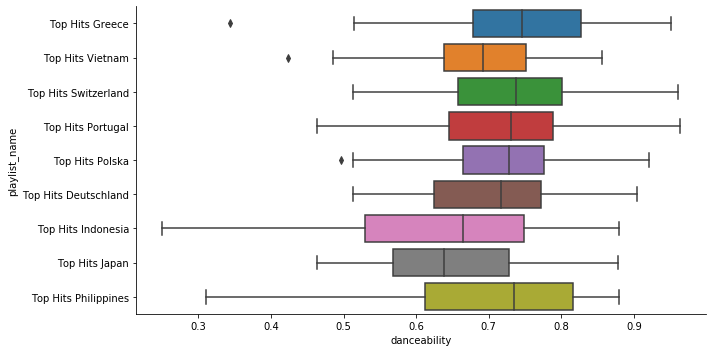

In [29]:
sns.catplot(
    data=top_hits_by_country_df,
    y='playlist_name',
    x='danceability',
    kind='box',
    aspect=2
    )

Looks like greece has the highest danceability playlist

## Energy

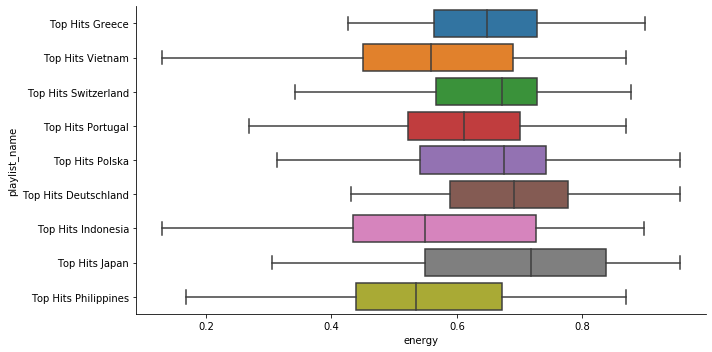

In [31]:
sns.catplot(
    data=top_hits_by_country_df,
    y='playlist_name',
    x='energy',
    kind='box',
    aspect=2
    )

## Loudness

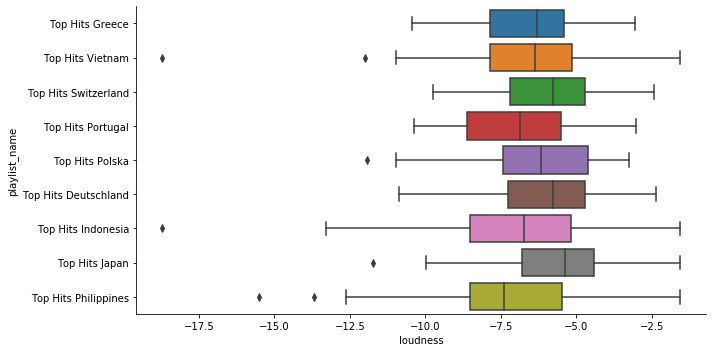

In [32]:
sns.catplot(
    data=top_hits_by_country_df,
    y='playlist_name',
    x='loudness',
    kind='box',
    aspect=2
    )

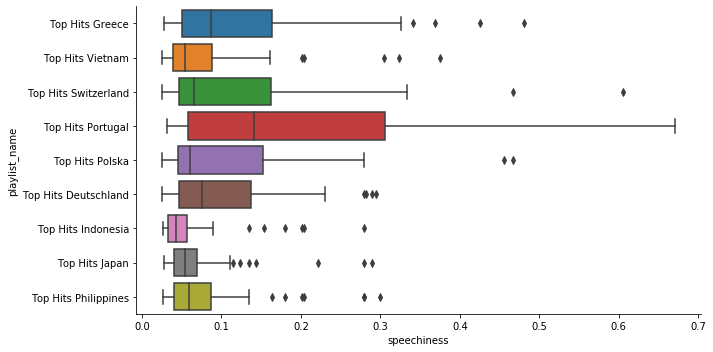

In [33]:
sns.catplot(
    data=top_hits_by_country_df,
    y='playlist_name',
    x='speechiness',
    kind='box',
    aspect=2
    )

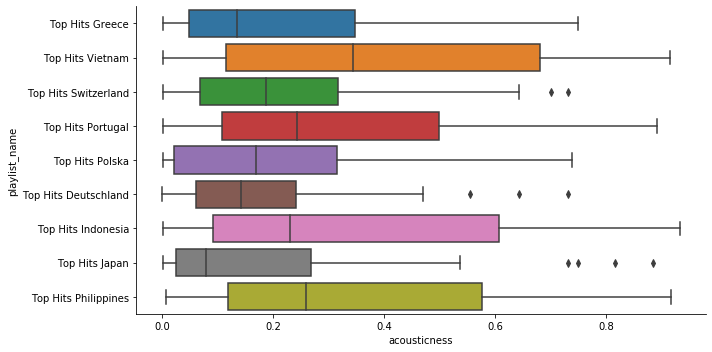

In [39]:
sns.catplot(
    data=top_hits_by_country_df,
    y='playlist_name',
    x='acousticness',
    kind='box',
    aspect=2
    )

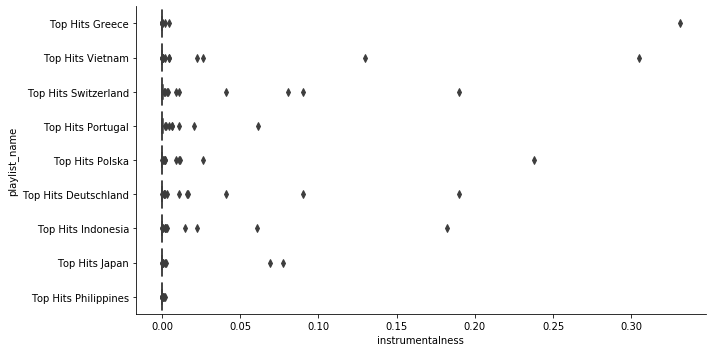

In [38]:
sns.catplot(
    data=top_hits_by_country_df,
    y='playlist_name',
    x='instrumentalness',
    kind='box',
    aspect=2
    )

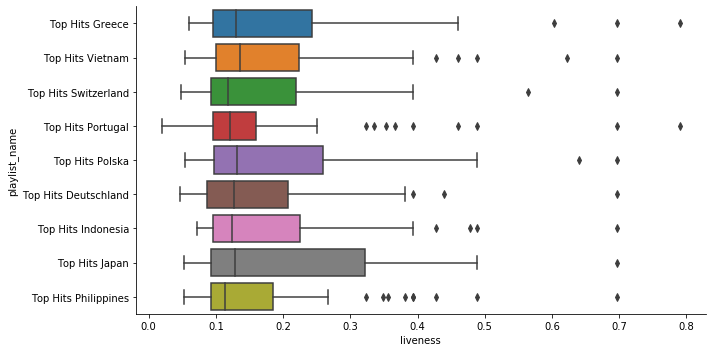

In [40]:
sns.catplot(
    data=top_hits_by_country_df,
    y='playlist_name',
    x='liveness',
    kind='box',
    aspect=2
    )

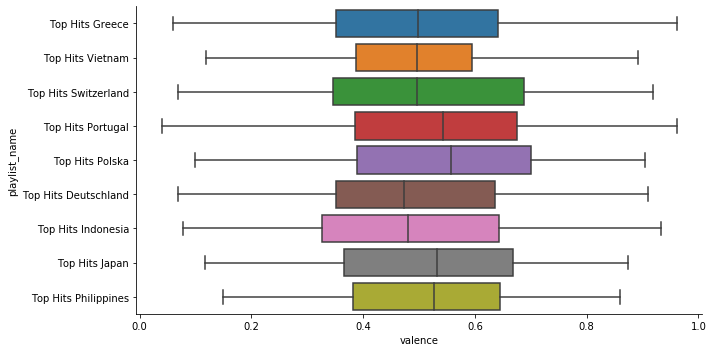

In [41]:
sns.catplot(
    data=top_hits_by_country_df,
    y='playlist_name',
    x='valence',
    kind='box',
    aspect=2
    )

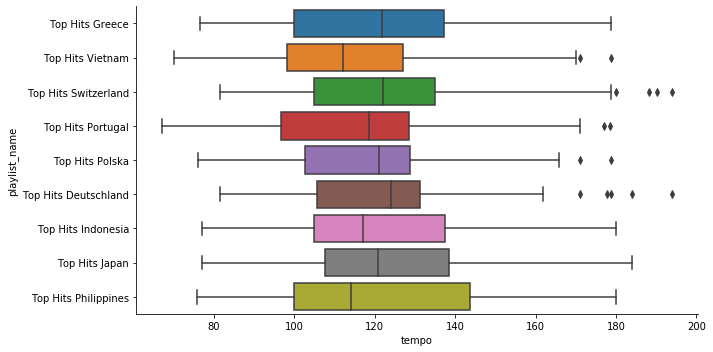

In [42]:
sns.catplot(
    data=top_hits_by_country_df,
    y='playlist_name',
    x='tempo',
    kind='box',
    aspect=2
    )

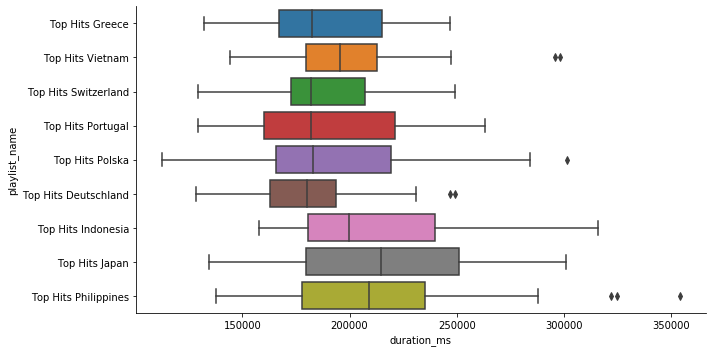

In [43]:
sns.catplot(
    data=top_hits_by_country_df,
    y='playlist_name',
    x='duration_ms',
    kind='box',
    aspect=2
    )